In [7]:
import tensorflow as tf
from tensorflow.io import decode_image, read_file
from tensorflow.image import resize_with_crop_or_pad, resize
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [8]:
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 64

def get_image(image_path):
    image = decode_image(read_file(image_path))
    image = resize_with_crop_or_pad(image, 256, 256)
    image = resize(image, (224, 224))
    return image

def get_dataset(X, y):
    path_dataset = tf.data.Dataset.from_tensor_slices(X)
    image_dataset = path_dataset.map(get_image, num_parallel_calls=AUTOTUNE)
    if y.all() == None:
        return image_dataset
    
    label_dataset = tf.data.Dataset.from_tensor_slices(tf.cast(y, tf.float32))

    dataset = tf.data.Dataset.zip(image_dataset, label_dataset)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTOTUNE)
    return dataset

In [9]:
labels_df = pd.read_csv('./dataset/training_solutions_rev1.csv')
labels_df

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [10]:
train_paths = os.listdir('./dataset/images_training_rev1/')
train_paths = ['./dataset/images_training_rev1/' + path for path in train_paths]
features = labels_df.values[:, 1:]

X_train, X_val, y_train, y_val = train_test_split(train_paths, features, test_size=0.2, random_state=0)

train_dataset = get_dataset(X_train, y_train)
val_dataset = get_dataset(X_val, y_val)

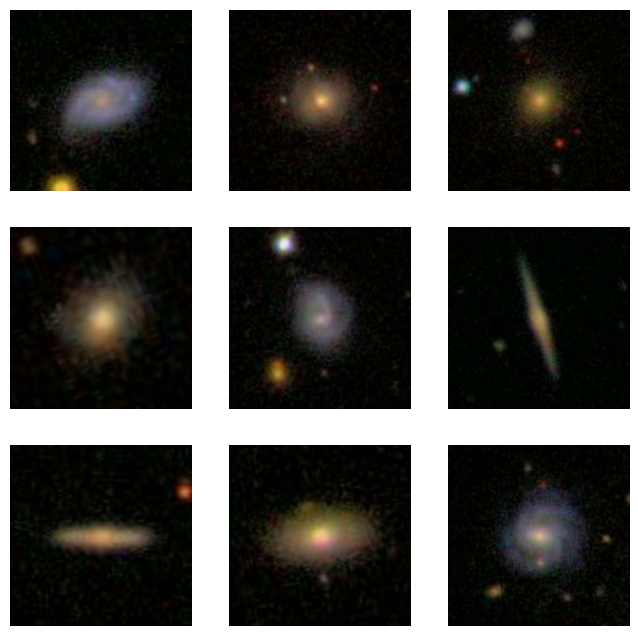

In [11]:
plt.figure(figsize=(8, 8))
for image, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.axis("off")

In [12]:
test_paths = os.listdir('./dataset/images_test_rev1/')
X_test = ['./dataset/images_test_rev1/' + path for path in test_paths]

test_path_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_dataset = test_path_dataset.map(get_image, num_parallel_calls=AUTOTUNE)